# Histogram

In [1]:
from smpl import animation
from smpl import plot
import matplotlib.pyplot as plt
import scipy
import numpy as np
import tqdm
import uncertainties as unc
from uncertainties import unumpy
from smpl import stat

<IPython.core.display.Javascript object>


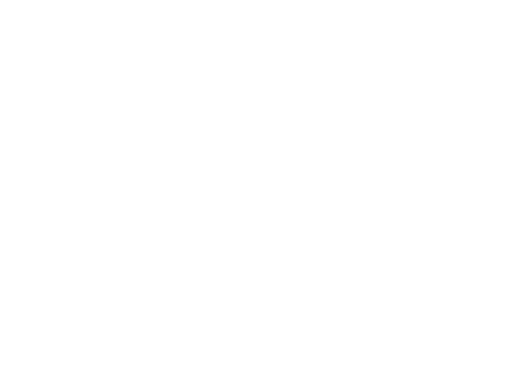

<IPython.core.display.Javascript object>


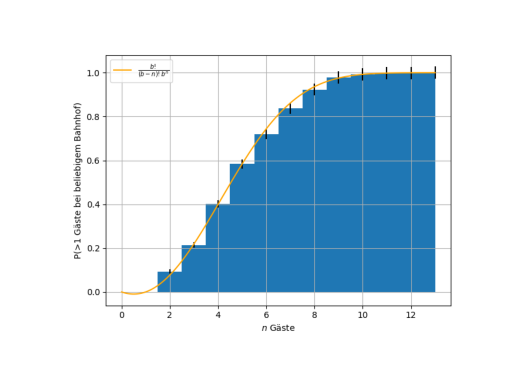

In [2]:
%matplotlib notebook 
#plt.ioff()
# Parameter
n = 13
bahnhs = 13
p = 1./bahnhs

bahnh = np.array(range(bahnhs))*0
datax = np.array(range(1,14))
datay = datax*0
c = 0

# Approximate factorial by gamma
def fac(n):
    return scipy.special.gamma(n+1)

def update(a):
    global bahnh,datax,datay,c,bahnhs
    c+=1
    bahnh = bahnh*0
    for i in range(n):
        bahnh[np.random.randint(0,bahnhs)] += 1
        if np.any(np.greater(bahnh,1)):
            datay[i] += 1
    plot.data(datax,stat.poisson_dist(datay)/c,init=True,tight=False,fmt="hist",ylabel="P(>1 Gäste bei beliebigem Bahnhof)",xlabel="$n$ Gäste",capsize=0)
    plot.function(lambda ni : 1.-fac(bahnhs)/(fac(bahnhs-ni)*bahnhs**ni),xmin=0,xmax=13,label="$\\frac{b!}{(b-n)!b^n}$",color="orange")
    
def init():
    global datay,bahnh,c
    datay = datay*0
    bahnh = bahnh*0
    c=0
    

ani = animation.animate(update = update,frames=np.linspace(0,20,2000), interval=10,blit=False)
plt.show()